# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 580


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
 # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Make request and store the response
        response = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | uturoa
Processing Record 2 of Set 1 | kabare
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | invercargill
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | urengoy
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | colon
Processing Record 9 of Set 1 | port elizabeth
Processing Record 10 of Set 1 | yemva
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | stanley
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | mount pearl
Processing Record 16 of Set 1 | port lincoln
Processing Record 17 of Set 1 | ghat
Processing Record 18 of Set 1 | olonkinbyen
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | enewetak
Processing Record 21 of Set 1 | wanganui
Processing Record 22 of Set 1 | puerto san carlos
City not found. Ski

Processing Record 37 of Set 4 | joaquin v. gonzalez
Processing Record 38 of Set 4 | saipan
Processing Record 39 of Set 4 | dudinka
Processing Record 40 of Set 4 | vingt cinq
City not found. Skipping...
Processing Record 41 of Set 4 | el hadjira
Processing Record 42 of Set 4 | mawlaik
Processing Record 43 of Set 4 | papatowai
Processing Record 44 of Set 4 | devinuwara
City not found. Skipping...
Processing Record 45 of Set 4 | troitsko-pechorsk
Processing Record 46 of Set 4 | el granada
Processing Record 47 of Set 4 | tabou
Processing Record 48 of Set 4 | fagaras
Processing Record 49 of Set 4 | thurso
Processing Record 0 of Set 5 | santa elena de uairen
Processing Record 1 of Set 5 | saldanha
Processing Record 2 of Set 5 | hermanus
Processing Record 3 of Set 5 | murzuq
Processing Record 4 of Set 5 | fuvahmulah
City not found. Skipping...
Processing Record 5 of Set 5 | nuriootpa
Processing Record 6 of Set 5 | tolanaro
Processing Record 7 of Set 5 | moranbah
Processing Record 8 of Set 5 |

City not found. Skipping...
Processing Record 28 of Set 8 | tafuna
Processing Record 29 of Set 8 | concepcion
Processing Record 30 of Set 8 | kuchinda
Processing Record 31 of Set 8 | port shepstone
Processing Record 32 of Set 8 | sorong
Processing Record 33 of Set 8 | colonia menno
Processing Record 34 of Set 8 | robore
Processing Record 35 of Set 8 | ulladulla
Processing Record 36 of Set 8 | wynyard
Processing Record 37 of Set 8 | keelung
Processing Record 38 of Set 8 | gordonvale
Processing Record 39 of Set 8 | nikolayevsk-on-amure
Processing Record 40 of Set 8 | kimbe
Processing Record 41 of Set 8 | kerikeri
Processing Record 42 of Set 8 | as sulayyil
Processing Record 43 of Set 8 | gunjur
Processing Record 44 of Set 8 | osterhofen
Processing Record 45 of Set 8 | constantia
Processing Record 46 of Set 8 | badagry
Processing Record 47 of Set 8 | cabedelo
Processing Record 48 of Set 8 | constitucion
Processing Record 49 of Set 8 | togur
Processing Record 0 of Set 9 | katsuura
Processi

Processing Record 18 of Set 12 | wellington
Processing Record 19 of Set 12 | tocopilla
Processing Record 20 of Set 12 | lorengau
Processing Record 21 of Set 12 | magadan
Processing Record 22 of Set 12 | lerwick
Processing Record 23 of Set 12 | salwa
Processing Record 24 of Set 12 | yuzhno-kurilsk
Processing Record 25 of Set 12 | bahla'
City not found. Skipping...
Processing Record 26 of Set 12 | zhosaly
Processing Record 27 of Set 12 | keflavik
Processing Record 28 of Set 12 | funafuti
Processing Record 29 of Set 12 | santo domingo de los colorados
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,uturoa,-16.7333,-151.4333,84.42,75,46,16.46,PF,1712874386
1,kabare,-2.4683,28.8242,62.38,94,99,0.72,CD,1712874569
2,grytviken,-54.2811,-36.5092,29.64,70,13,9.64,GS,1712874098
3,invercargill,-46.4000,168.3500,49.01,84,100,1.99,NZ,1712874461
4,adamstown,-25.0660,-130.1015,69.89,54,3,13.35,PN,1712874086


In [13]:
if not os.path.exists("output_data"):
    os.makedirs("output_data")

In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,uturoa,-16.7333,-151.4333,84.42,75,46,16.46,PF,1712874386
1,kabare,-2.4683,28.8242,62.38,94,99,0.72,CD,1712874569
2,grytviken,-54.2811,-36.5092,29.64,70,13,9.64,GS,1712874098
3,invercargill,-46.4000,168.3500,49.01,84,100,1.99,NZ,1712874461
4,adamstown,-25.0660,-130.1015,69.89,54,3,13.35,PN,1712874086


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

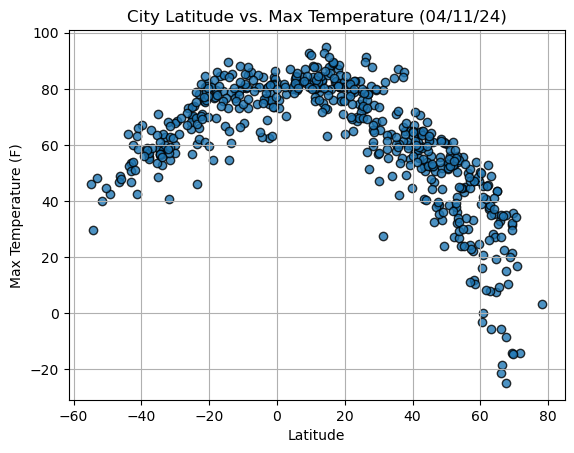

In [16]:
# Build scatter plot for latitude vs. temperature
# # Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()



#### Latitude Vs. Humidity

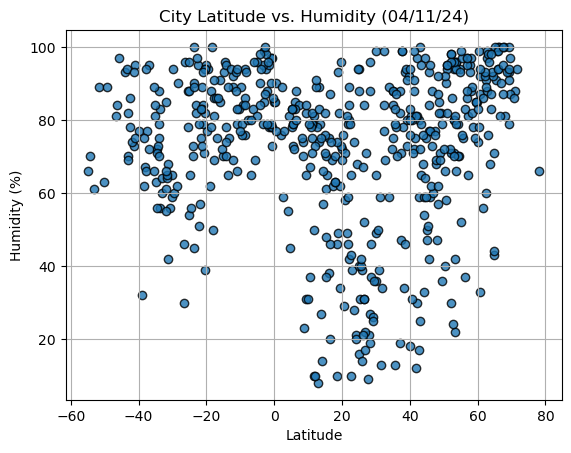

In [18]:
# Build the scatter plots for latitude vs. humidity
# # Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

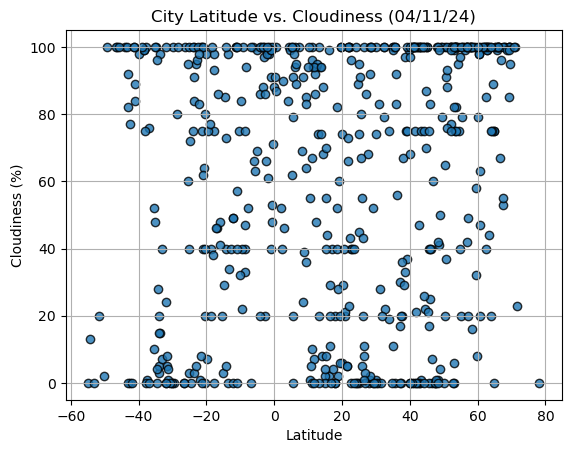

In [22]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x")) 
plt.ylabel("Cloudiness (%)") 
plt.xlabel("Latitude") 
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

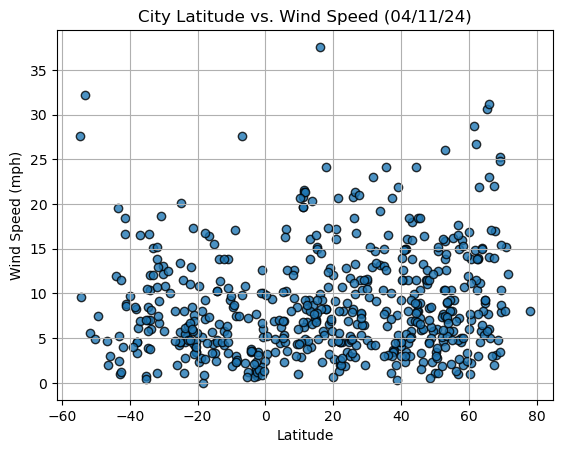

In [23]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x")) 
plt.ylabel("Wind Speed (mph)") 
plt.xlabel("Latitude") 
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [29]:
# Define a function to create Linear Regression plots

def plot_weather_regression(x_values, y_values, xlabel, ylabel, text_coordinates, ylim=None):
  # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create scatter plot with linear regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")

    # Annotate the plot with the line equation and correlation coefficient
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.annotate(f"r² = {round(rvalue**2, 3)}",text_coordinates[::-1],fontsize=15,color="red")

    # Set properties for the plot
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Set y-axis limits if specified
    if ylim:
        plt.ylim(ylim)

    # Show plot
    plt.show()

In [28]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_data = [city for city in city_data if city["Lat"] >= 0]
northern_hemi_df = pd.DataFrame(northern_hemi_data)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,urengoy,65.9667,78.3667,-5.60,94,100,14.12,RU,1712874487
1,colon,9.3592,-79.9014,81.99,82,85,8.52,PA,1712874475
2,yemva,62.5900,50.8594,37.09,91,100,13.89,RU,1712874574
3,stanley,54.8680,-1.6985,55.71,94,40,10.36,GB,1712874082
4,bethel,41.3712,-73.4140,58.64,88,100,3.44,US,1712874547


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_data = [city for city in city_data if city["Lat"] < 0]
southern_hemi_df = pd.DataFrame(southern_hemi_data)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,uturoa,-16.7333,-151.4333,84.42,75,46,16.46,PF,1712874386
1,kabare,-2.4683,28.8242,62.38,94,99,0.72,CD,1712874569
2,grytviken,-54.2811,-36.5092,29.64,70,13,9.64,GS,1712874098
3,invercargill,-46.4000,168.3500,49.01,84,100,1.99,NZ,1712874461
4,adamstown,-25.0660,-130.1015,69.89,54,3,13.35,PN,1712874086


###  Temperature vs. Latitude Linear Regression Plot

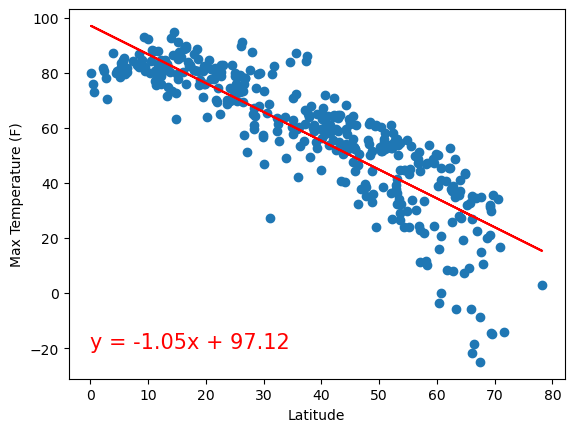

In [31]:
# Linear regression on Northern Hemisphere
# Define x and y variables
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the plot_weather_regression() function
plot_weather_regression(x_values, y_values, "Latitude", "Max Temperature (F)", (0, -20))

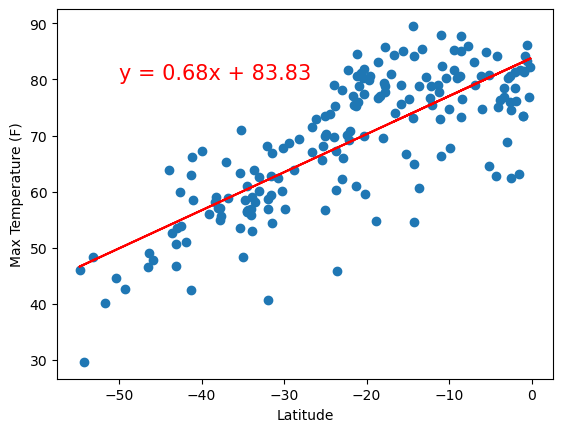

In [32]:
# Linear regression on Southern Hemisphere
# Define x and y variables
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the plot_weather_regression() function
plot_weather_regression(x_values, y_values, "Latitude", "Max Temperature (F)", (-50, 80))

**Discussion about the linear relationship:** The analysis of the temperature in relation to latitude for both hemispheres shows that there are clear relationships between them. In the Northern Hemisphere, as we move farther north, the temperature decreases and in the Southern Hemisphere, as we move farther south, the temperature tends to increase. This is because the Northern Hemisphere colder.

### Humidity vs. Latitude Linear Regression Plot

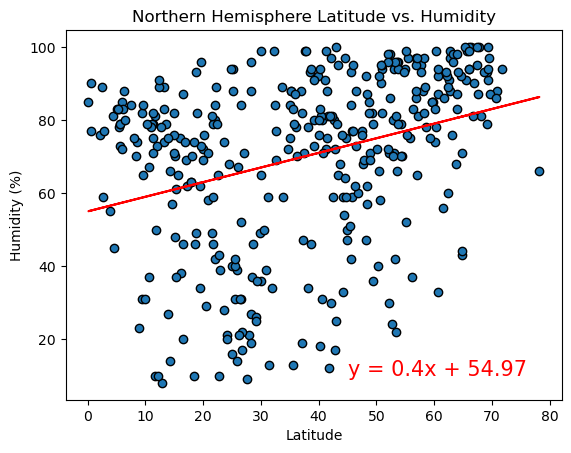

In [35]:
# Northern Hemisphere
# Create Northern Hemisphere DataFrame
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Generate a scatter plot of latitude vs. humidity for cities in the Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], marker="o", edgecolor="black")

# Add titles and labels to the plot
plt.title("Northern Hemisphere Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Perform linear regression on latitude vs. humidity
slope, intercept, rvalue, pvalue, stderr = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
# Calculate the predictions and put them in a list
regress_values = northern_hemi_df["Lat"] * slope + intercept
# Create a string with the equation of the line
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
# Plot the regression line
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")
# Add the equation of the line to the plot
plt.annotate(line_eq, (45,10), fontsize=15, color="red")

# Display the plot
plt.show()

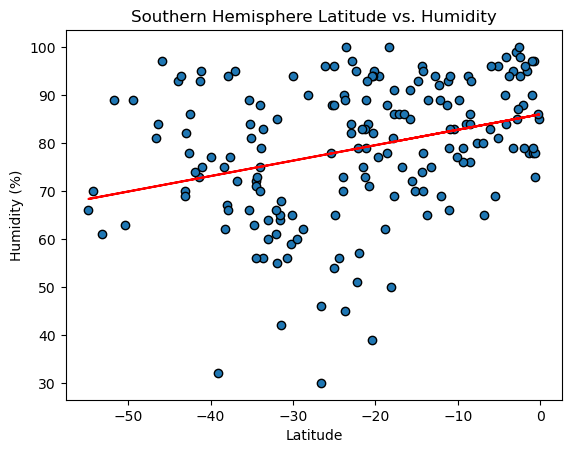

In [34]:
# Southern Hemisphere

# Create Southern Hemisphere DataFrame
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Generate a scatter plot of latitude vs. humidity for cities in the Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], marker="o", edgecolor="black")

# Add titles and labels to the plot
plt.title("Southern Hemisphere Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Perform linear regression on latitude vs. humidity
slope, intercept, rvalue, pvalue, stderr = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
# Calculate the predictions and put them in a list
regress_values = southern_hemi_df["Lat"] * slope + intercept
# Create a string with the equation of the line
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
# Plot the regression line
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")
# Add the equation of the line to the plot
plt.annotate(line_eq, (-50,20), fontsize=15, color="red")

# Display the plot
plt.show()


**Discussion about the linear relationship:** Linear regression analyses, it appears that there is not a strong relationship between humidity and latitude in either the Northern or Southern Hemisphere. The linear regression lines for both hemispheres have very low slopes, indicating that there is not a significant linear relationship. 

### Cloudiness vs. Latitude Linear Regression Plot

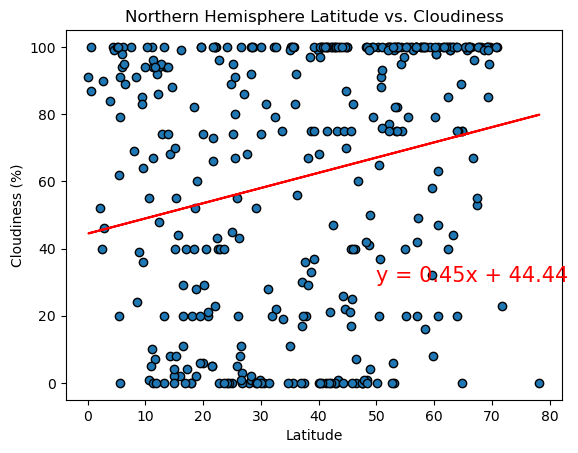

In [36]:
# Northern Hemisphere
# Create Northern Hemisphere DataFrame
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Generate a scatter plot of latitude vs. cloudiness for cities in the Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], marker="o", edgecolor="black")

# Add titles and labels to the plot
plt.title("Northern Hemisphere Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Perform linear regression on latitude vs. cloudiness
slope, intercept, rvalue, pvalue, stderr = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
# Calculate the predictions and put them in a list
regress_values = northern_hemi_df["Lat"] * slope + intercept
# Create a string with the equation of the line
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
# Plot the regression line
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")
# Add the equation of the line to the plot
plt.annotate(line_eq, (50,30), fontsize=15, color="red")

# Display the plot
plt.show()

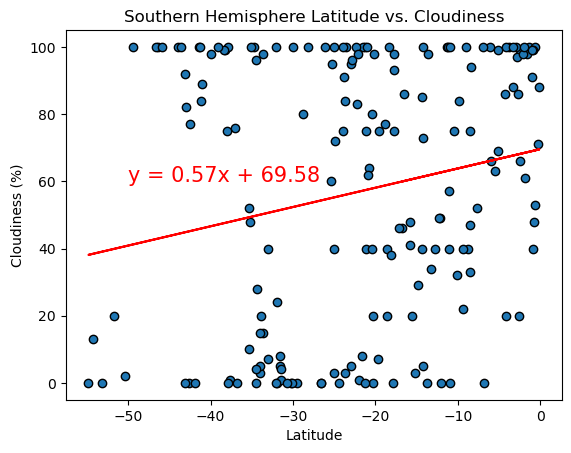

In [39]:
# Southern Hemisphere
# Create Southern Hemisphere DataFrame
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Generate a scatter plot of latitude vs. cloudiness for cities in the Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], marker="o", edgecolor="black")

# Add titles and labels to the plot
plt.title("Southern Hemisphere Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Perform linear regression on latitude vs. cloudiness
slope, intercept, rvalue, pvalue, stderr = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
# Calculate the predictions and put them in a list
regress_values = southern_hemi_df["Lat"] * slope + intercept
# Create a string with the equation of the line
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
# Plot the regression line
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")
# Add the equation of the line to the plot
plt.annotate(line_eq, (-50,60), fontsize=15, color="red")

# Display the plot
plt.show()

**Discussion about the linear relationship:** The scatter plots for cloudiness vs. latitude in both the Northern and Southern Hemispheres show a weak, but somewhat positive linear relationship between the two variables. 

### Wind Speed vs. Latitude Linear Regression Plot

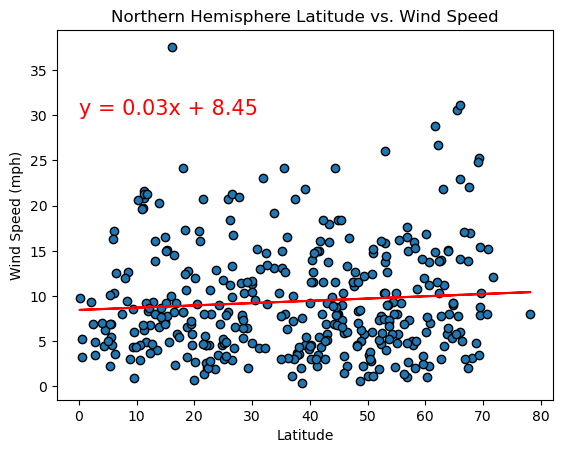

In [40]:
# Northern Hemisphere
# Create Northern Hemisphere DataFrame
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Generate a scatter plot of latitude vs. wind speed for cities in the Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], marker="o", edgecolor="black")

# Add titles and labels to the plot
plt.title("Northern Hemisphere Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Perform linear regression on latitude vs. wind speed
slope, intercept, rvalue, pvalue, stderr = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
# Calculate the predictions and put them in a list
regress_values = northern_hemi_df["Lat"] * slope + intercept
# Create a string with the equation of the line
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
# Plot the regression line
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")
# Add the equation of the line to the plot
plt.annotate(line_eq, (0,30), fontsize=15, color="red")

# Display the plot
plt.show()

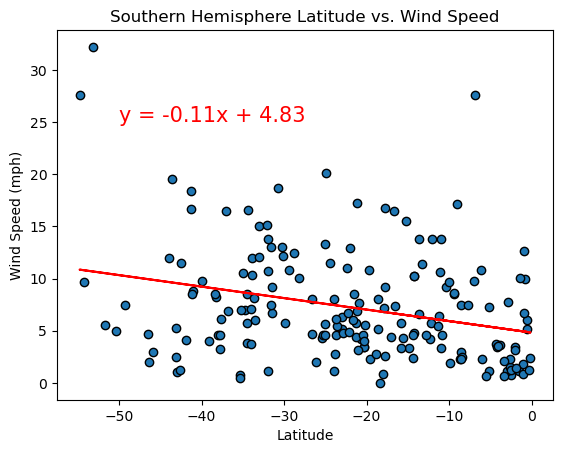

In [41]:
# Southern Hemisphere
# Create Southern Hemisphere DataFrame
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Generate a scatter plot of latitude vs. wind speed for cities in the Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], marker="o", edgecolor="black")

# Add titles and labels to the plot
plt.title("Southern Hemisphere Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Perform linear regression on latitude vs. wind speed
slope, intercept, rvalue, pvalue, stderr = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
# Calculate the predictions and put them in a list
regress_values = southern_hemi_df["Lat"] * slope + intercept
# Create a string with the equation of the line
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
# Plot the regression line
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")
# Add the equation of the line to the plot
plt.annotate(line_eq, (-50,25), fontsize=15, color="red")

# Display the plot
plt.show()

**Discussion about the linear relationship:** The Wind Speed vs. Latitude Linear Regression plot is a visualization that shows the relationship between wind speed and latitude in the specified hemisphere. The scatter plot represents the distribution of wind speeds across different latitudes, while the regression line shows the trend or pattern of the data.